In [1]:
import sys
sys.path.append("../")

%load_ext autoreload
%autoreload 2

In [3]:
import os
import numpy as np
#import cv2
#from PIL import Image
import random
import datetime
import io
#from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import json

from models.deeplab import *
from data_generators.datasets import deepfashion
import argparse
from utils.datagen_utils import denormalize_image
from utils.plot_utils import centroid_histogram, mask_and_downsample, get_average_color, normalize_colors

import yaml
from PIL import Image
import cv2 

#from sklearn.cluster import DBSCAN
#from sklearn.cluster import KMeans

#%matplotlib inline

from predictors.predictor_deepfashion import PredictorDeepFashion

%matplotlib inline

In [24]:
predictor = PredictorDeepFashion(base_dir = "../")
num_classes = len(predictor.categories_dict)

### Predict segmentation map

In [25]:
base_folder = '../../datasets/immagini_max_mara/capi_singoli/'
filenames = os.listdir(base_folder)

In [26]:
index = random.randint(0, len(filenames) - 1)
filename = filenames[index]

image, prediction = predictor.segment_image(base_folder, filename)

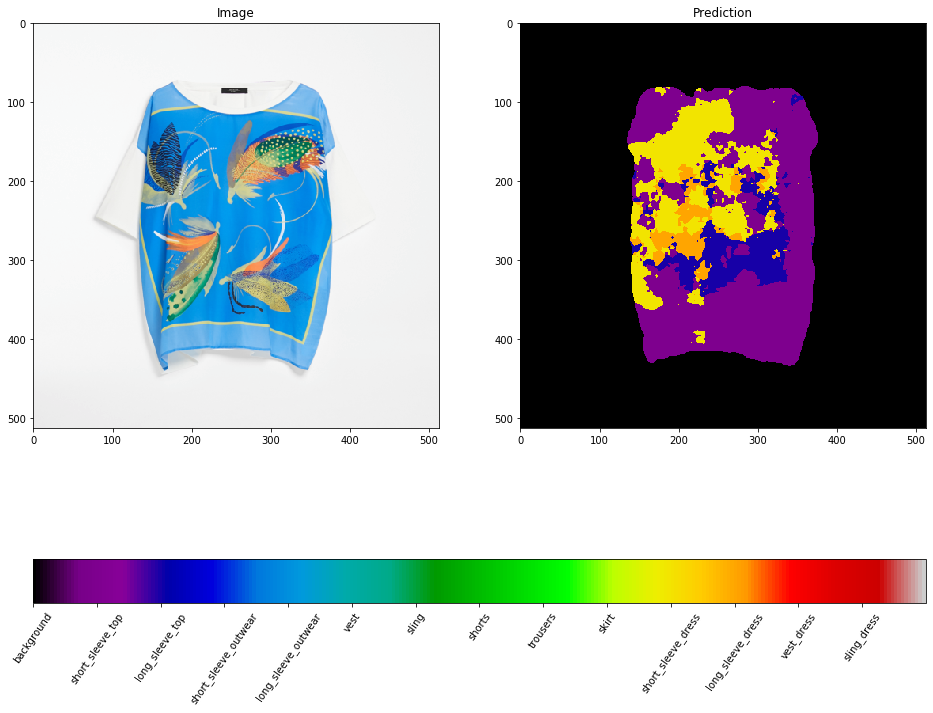

In [32]:
fig, axs = plt.subplots(1, 2, figsize=(16, 16))

images = []

axs[0].set_title("Image")
axs[1].set_title("Prediction")

images.append(axs[0].imshow(image.astype(int)))
images.append(axs[1].imshow(prediction, cmap=plt.get_cmap('nipy_spectral'), vmin=0, vmax=num_classes))
    
cbar = fig.colorbar(images[1], ax=axs, orientation='horizontal', ticks=[x for x in range(num_classes)], fraction=.1)
cbar.ax.set_xticklabels(predictor.categories_dict.keys(), rotation=55)


plt.show()